# Helpful (hopefully) notes and general measurement tips

- **Spectrum Analyzer:** The spectrum analyzer tends to timeout if it hasn't been used in a while. To restart it, simply execute the qubit initialization again or use the qb._instrument.set() command to send a value and wake the instrument back up.
- 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qubit import qubit
import numpy as np
import plot_functions as pf
# from instrument_init import init_sa

2024-04-05 11:03:11,023 - qm - INFO     - Starting session: f21f1115-9fb8-47e9-bc89-345fab17c8b1


# Initialize qubit

In [186]:
qb = qubit('q1-testing')

Loading parameter JSON file
2024-04-05 19:47:59,064 - qm - INFO     - Performing health check
2024-04-05 19:47:59,076 - qm - INFO     - Health check passed
Loading instrument settings from experiments\test\test_instruments.json.
Initializing readout_LO (BNC 845 Signal Generator).
Initializing qubit_LO (SignalCore SC5506A Signal Generator).
Initializing DA (Vaunix Lab Brick Digital Attenuator).
Initializing sa (SignalHound SpectrumAnalyzer).
Setting readout_LO frequency to 6415000000.0.
Setting readout_LO output to True.
Setting qubit_LO frequency to 5700000000.0.
Setting qubit_LO power to 17.
Setting qubit_LO output to True.
Setting DA attenuation to 0.


# Time of flight

Updating readout_atten to 0
Setting DA attenuation to 0.
Updating n_avg to 1000
Updating rr_IF to 5000000.0
Updating readout_length to 2000
2024-04-05 20:22:16,241 - qm - INFO     - Performing health check
2024-04-05 20:22:16,253 - qm - INFO     - Health check passed
2024-04-05 20:22:16,434 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:22:16,470 - qm - INFO     - Executing program
Input 1 Offset: 0.04971923828124973 mV
Input 2 Offset: -0.16835550742574243 mV
Updating analog_input_offsets to [-0.0015943497196513547, 0.005649863110856266]


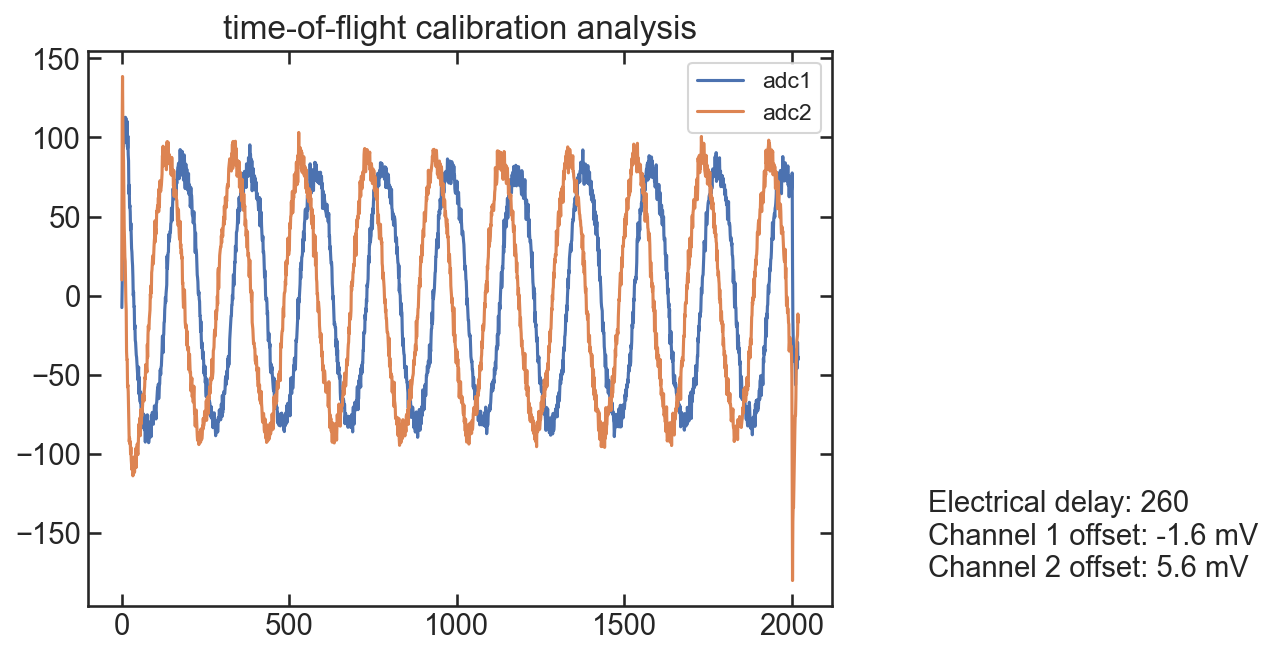

In [224]:
qb.update_value('readout_atten',0)
# qb.update_value('tof',60)
# qb.update_value('smearing',10)
qb.pars['resettime']['rr'] = 4000
qb.write_pars()
qb.update_value('n_avg',1000)
qb.update_value('rr_IF',5e6)
qb.update_value('readout_length',2000)

adc1,adc2 = qb.tof_cal(update_tof=False)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

# Optimize Mixers

## Minimize LO leakage 

Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6400000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.
LO at 6.4 GHz
Current I_offset = -12.6 mV, Current Q_offset = 3.4 mV
Setting sa frequency to 6400000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -49.40907287597656.
Setting sa bandwidth to 1000.0.


100%|██████████| 121/121 [00:13<00:00,  9.11it/s]


Updating rr_mixer_offsets to [-0.010699999999999935, 0.0013000000000000051]
optimal I_offset = -10.7 mV, optimal Q_offset = 1.3 mV
Updating readout_atten to 30
Setting DA attenuation to 30.
Power: -102.63050842285156 dBm at 6.4 GHz


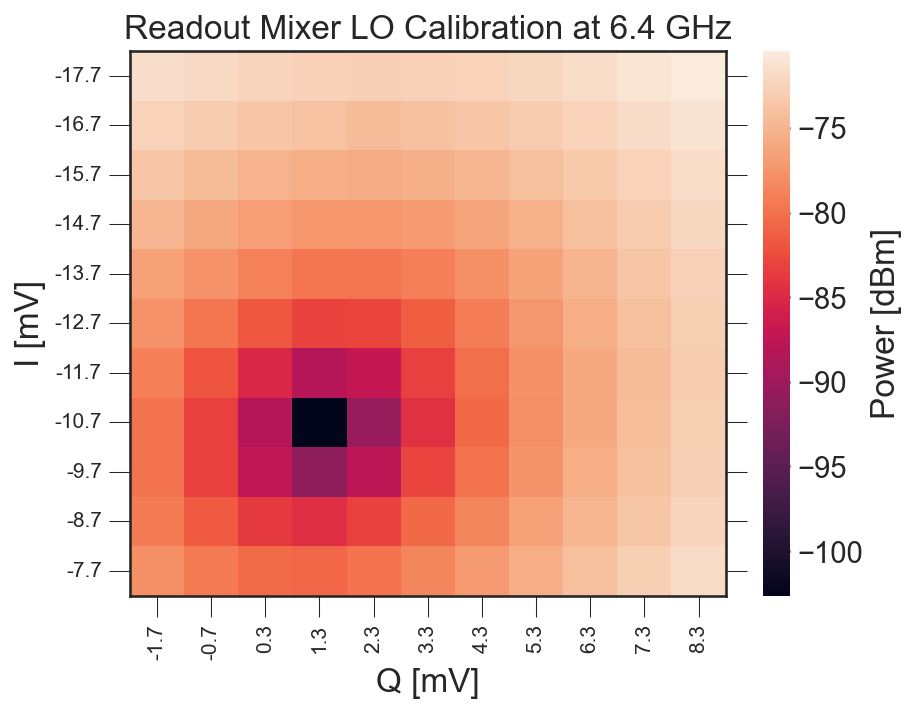

In [227]:
# qb.update_value('rr_LO',6.4e9)
# qb.get_power(fc=qb.pars['rr_LO'],threshold=-20,span=1e6,config=True,plot=True)
qb.opt_lo_leakage(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

In [ ]:
qb.opt_lo_leakage(mode='fine',element='rr',sa_span=0.5e6,threshold=-50,plot=True)

## Minimize image sideband

2024-04-05 20:23:21,649 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:23:21,678 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6395000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.


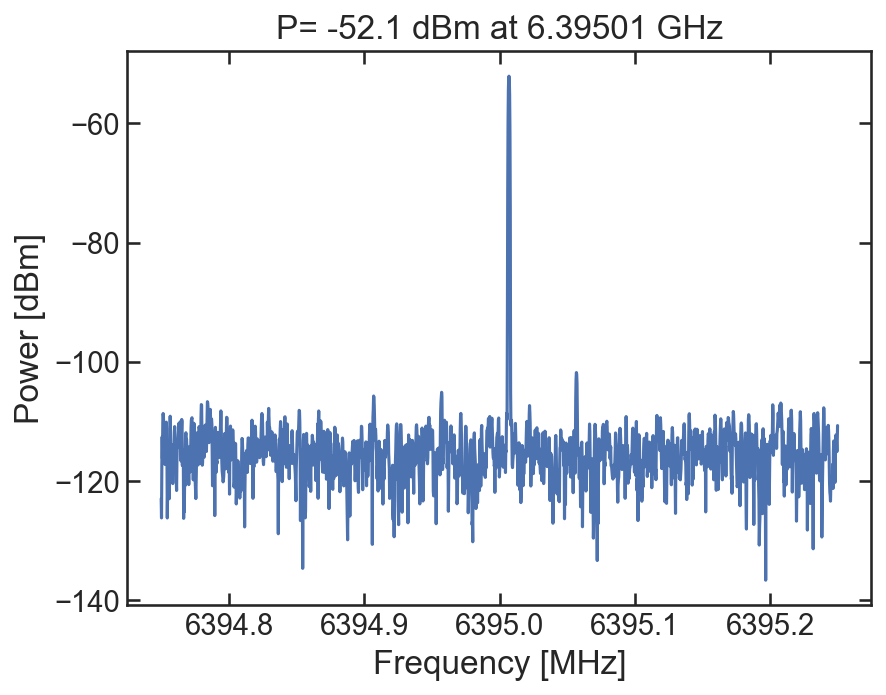

-52.09524917602539 dBm at 6.3950069361972055 GHz
Sideband at 6.395 GHz
Current gain = -0.0111, Current phase = -0.0833


100%|██████████| 100/100 [00:10<00:00,  9.43it/s]


Updating rr_mixer_imbalance to (0.0, -5.551115123125783e-17)
optimal gain = 0.0, optimal phi = -0.0
Updating readout_atten to 30
Setting DA attenuation to 30.
Power: -52.207908630371094 dBm at 6.395 GHz


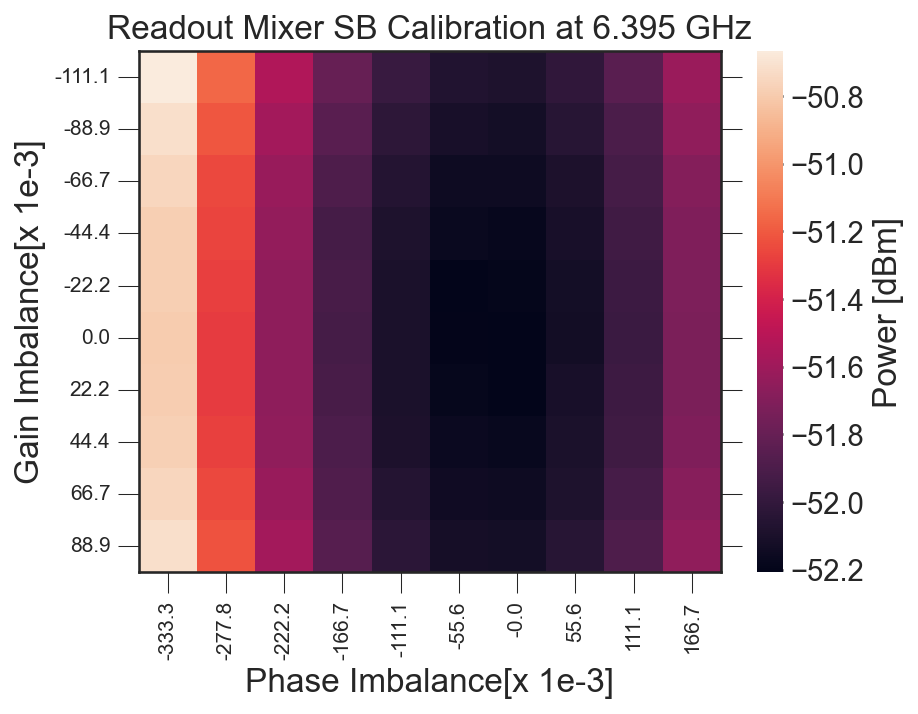

In [228]:
# qb.update_value('rr_IF',50e6)
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

In [ ]:
qb.opt_sideband(mode='fine',element='rr',sa_span=0.5e6,threshold=-50,plot=True)

# Resonator spectroscopy

**Notes on resonator spectroscopy**

In [271]:
qb.update_value('readout_length', 4000)   ##wanted a clearer peak
# qb.update_value('tof',252)
# qb.update_value('smearing',60)
# qb.update_value('rr_resettime',8000)
# qb.pars['resettime']['rr'] = 2000
qb.write_pars()
# qb.update_value('n_avg',1000)
qb.update_value('readout_atten',0)
df_resonator_spec = 0.25e6
qb.experiment = 'resonator_spec'
##added a 10db fixed attenuator on rr line after the spiltter and just before fridge input
data, job = qb.resonator_spec(
                       f_LO = 6.35e9,
                       IF_min = 50e6,
                       IF_max = 150e6,
                       df = df_resonator_spec,
                       fit=True,
                       on_off=False,
                       savedata=False,
                       showprogress=True)

Updating readout_length to 4000
Updating readout_atten to 0
Setting DA attenuation to 0.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:33:52,241 - qm - INFO     - Performing health check
2024-04-05 20:33:52,253 - qm - INFO     - Health check passed
2024-04-05 20:33:52,603 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:33:52,841 - qm - INFO     - Executing program


100%|█████████▉| 999/1000 [00:13<00:00, 76.62it/s]


Resonant Frequency: 6.44975 GHz
FWHM = 25.5 MHz
kappa = 160.221 MHz


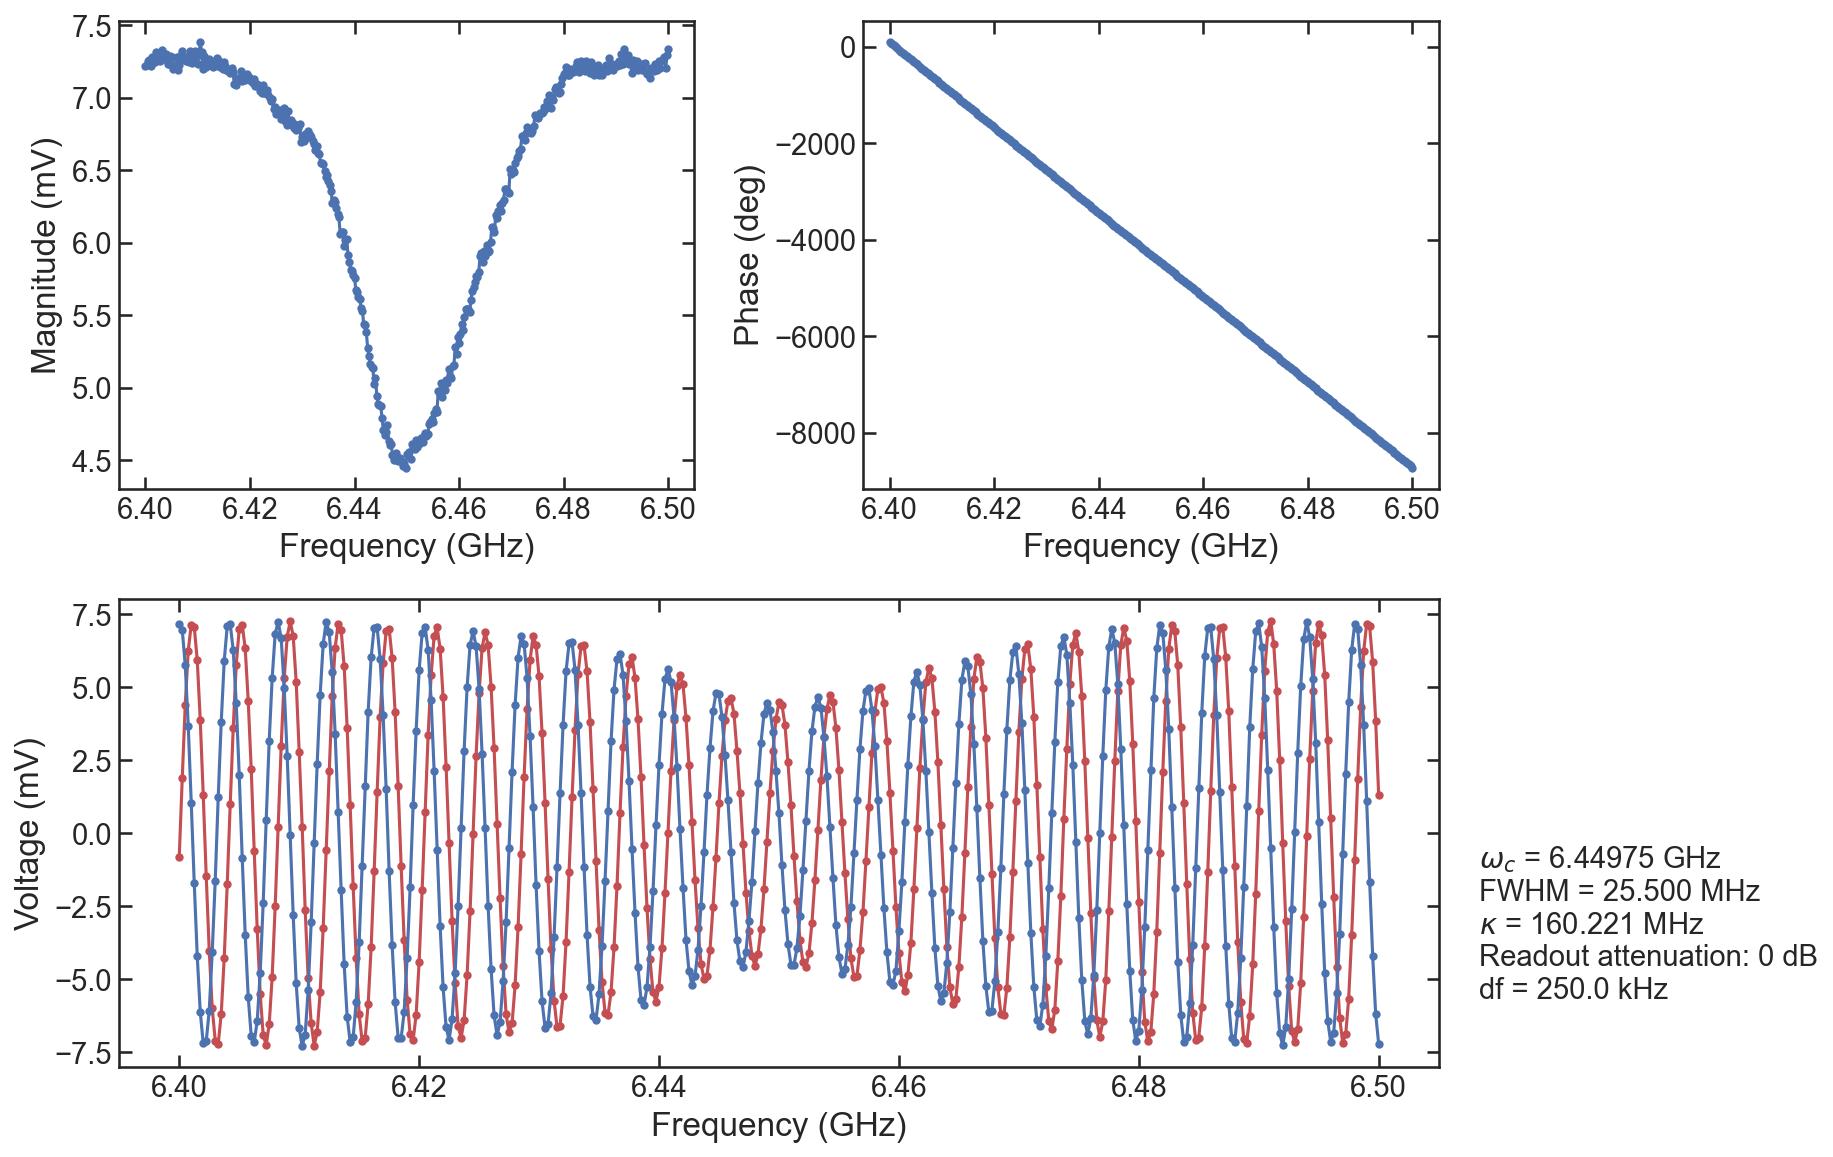

In [272]:
fc,fwhm = pf.fit_res(data['freqs'],data['I'],data['Q'])
pf.resonator_spec_plot(data,qb_pars=qb.pars,fwhm=fwhm,fc=fc)

In [249]:
from resonator import Resonator

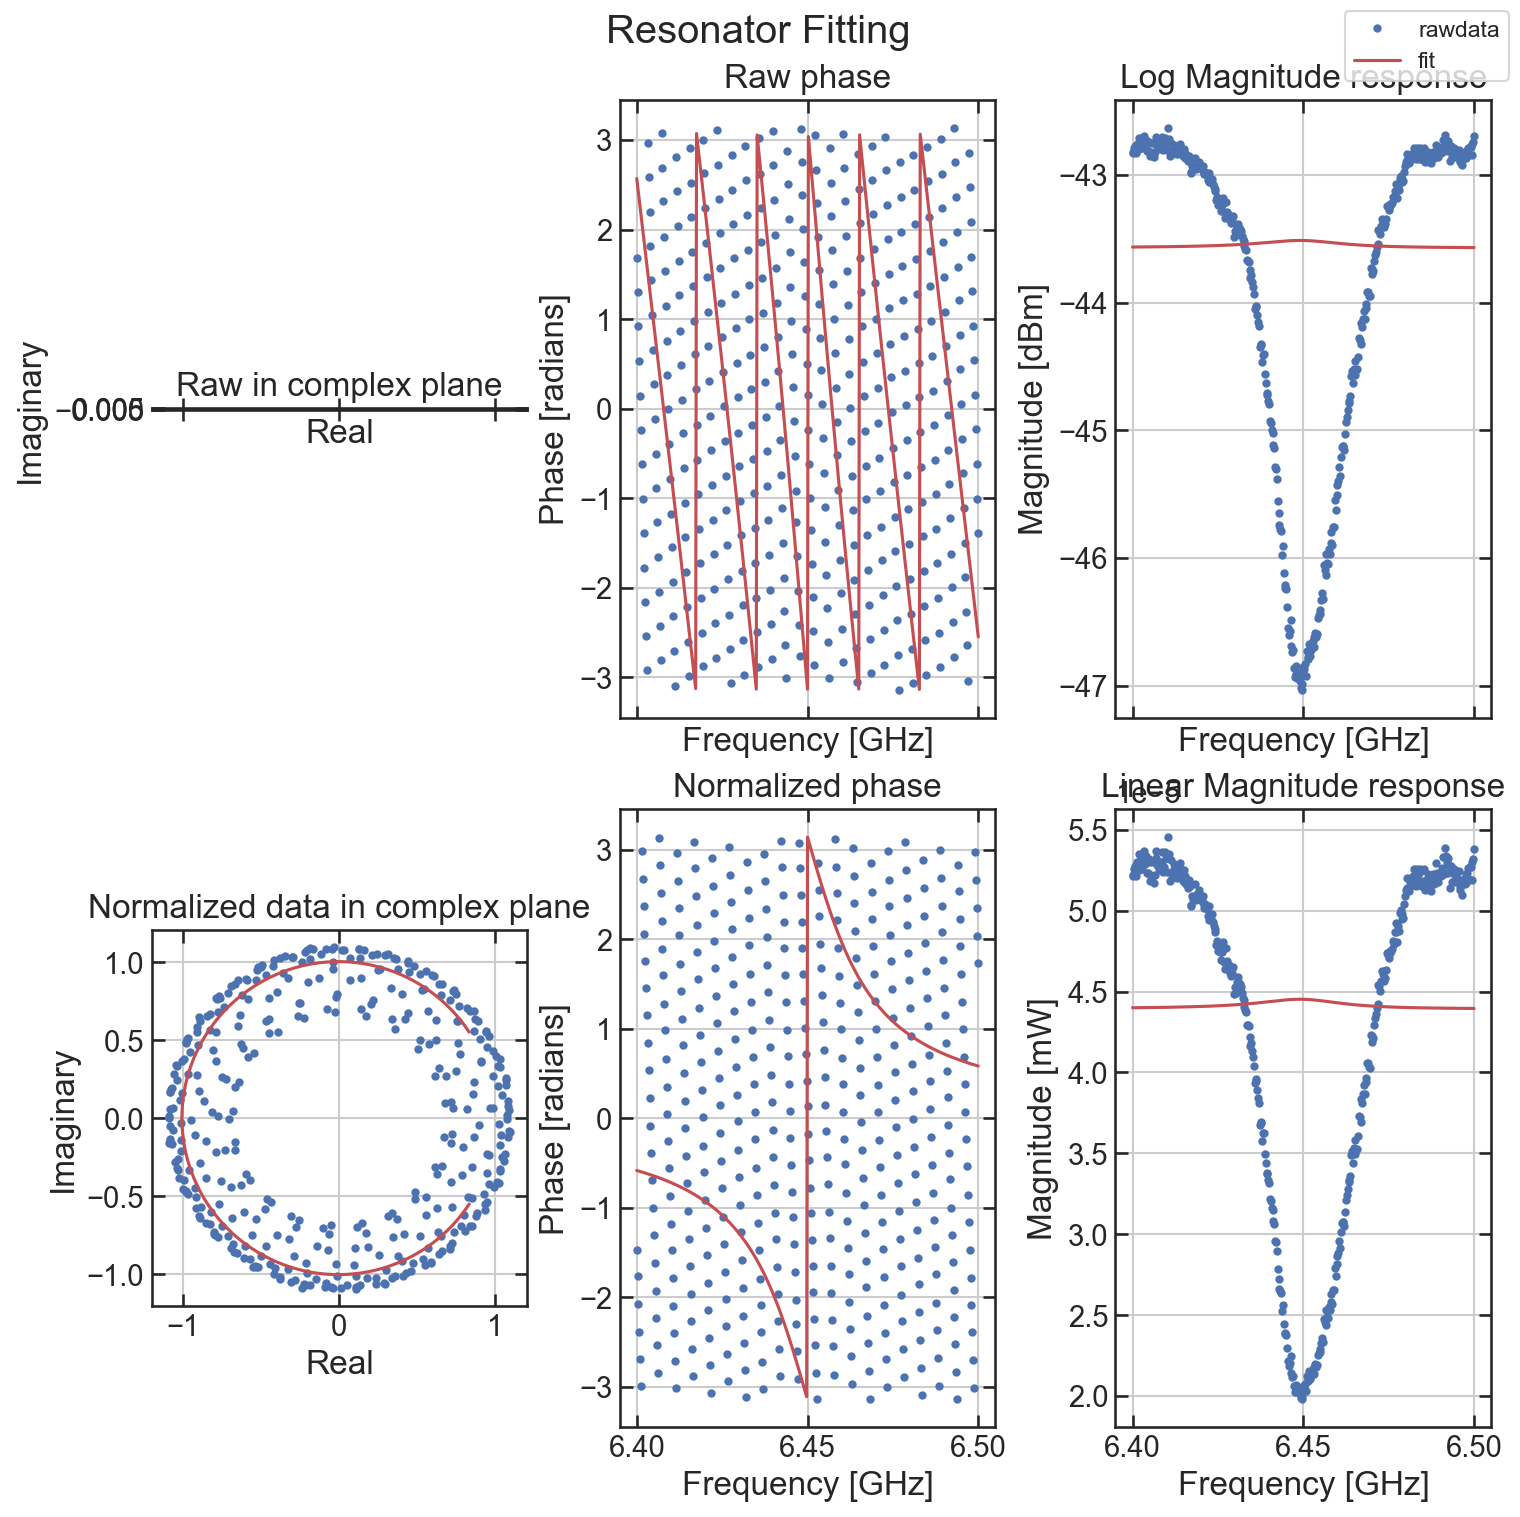

In [276]:
res = Resonator(port_type='n',f_data=data['freqs'],z_data=data['I']+1j*data['Q'])
res.autofit(electric_delay=50e-9)
res.show()


# Qubit Punchout

**Notes on qubit punchout**

*Objectives*
1. Determine if there is a qubit coupled to a cavity.
2. Determine the readout power at which the qubit is punched out. Used for subsequent measurements.

Starting at low readout power and then gradually decreasing the attenuation, you should see the readout resonance shift in frequency. Since the qubit and readout resonances repel each other, if the qubit frequency is less than the readout frequency, the resonant frequency whill shift to lower frequency after the qubit is punched out, and vice versa. Between the high and low readout power frequencies, the resonator behaves in a non-linear way. We definitely want to operate outside of that region. 

In [277]:
attenuations = np.arange(0,50,5)
qb.update_value('n_avg',1000)
data, job = qb.punchout(df = 0.75e6,
                #  f_LO = 6.35e9,
                IF_min = 75e6,
                IF_max = 150e6,
                 attenuations=attenuations,
                 savedata=False)

Updating n_avg to 1000


  0%|          | 0/10 [00:00<?, ?it/s]

Attenuation = 0 dB
Setting DA attenuation to 0.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:39:22,948 - qm - INFO     - Performing health check
2024-04-05 20:39:22,984 - qm - INFO     - Health check passed
2024-04-05 20:39:23,471 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:39:23,600 - qm - INFO     - Executing program


 10%|█         | 1/10 [00:04<00:40,  4.55s/it]

Attenuation = 5 dB
Setting DA attenuation to 5.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:39:27,409 - qm - INFO     - Performing health check
2024-04-05 20:39:27,422 - qm - INFO     - Health check passed
2024-04-05 20:39:27,781 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:39:27,876 - qm - INFO     - Executing program


 20%|██        | 2/10 [00:08<00:34,  4.36s/it]

Attenuation = 10 dB
Setting DA attenuation to 10.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:39:31,635 - qm - INFO     - Performing health check
2024-04-05 20:39:31,648 - qm - INFO     - Health check passed
2024-04-05 20:39:31,983 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:39:32,094 - qm - INFO     - Executing program


 30%|███       | 3/10 [00:13<00:30,  4.31s/it]

Attenuation = 15 dB
Setting DA attenuation to 15.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:39:35,890 - qm - INFO     - Performing health check
2024-04-05 20:39:35,926 - qm - INFO     - Health check passed
2024-04-05 20:39:36,237 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:39:36,478 - qm - INFO     - Executing program


 40%|████      | 4/10 [00:17<00:25,  4.28s/it]

Attenuation = 20 dB
Setting DA attenuation to 20.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:39:40,102 - qm - INFO     - Performing health check
2024-04-05 20:39:40,115 - qm - INFO     - Health check passed
2024-04-05 20:39:40,437 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:39:40,565 - qm - INFO     - Executing program


 50%|█████     | 5/10 [00:21<00:21,  4.26s/it]

Attenuation = 25 dB
Setting DA attenuation to 25.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:39:44,303 - qm - INFO     - Performing health check
2024-04-05 20:39:44,316 - qm - INFO     - Health check passed
2024-04-05 20:39:44,646 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:39:44,893 - qm - INFO     - Executing program


 60%|██████    | 6/10 [00:25<00:16,  4.24s/it]

Attenuation = 30 dB
Setting DA attenuation to 30.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:39:48,513 - qm - INFO     - Performing health check
2024-04-05 20:39:48,525 - qm - INFO     - Health check passed
2024-04-05 20:39:48,864 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:39:48,959 - qm - INFO     - Executing program


 70%|███████   | 7/10 [00:29<00:12,  4.22s/it]

Attenuation = 35 dB
Setting DA attenuation to 35.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:39:52,674 - qm - INFO     - Performing health check
2024-04-05 20:39:52,686 - qm - INFO     - Health check passed
2024-04-05 20:39:53,008 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:39:53,122 - qm - INFO     - Executing program


 80%|████████  | 8/10 [00:34<00:08,  4.22s/it]

Attenuation = 40 dB
Setting DA attenuation to 40.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:39:56,935 - qm - INFO     - Performing health check
2024-04-05 20:39:56,947 - qm - INFO     - Health check passed
2024-04-05 20:39:57,254 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:39:57,493 - qm - INFO     - Executing program


 90%|█████████ | 9/10 [00:38<00:04,  4.21s/it]

Attenuation = 45 dB
Setting DA attenuation to 45.
Updating rr_LO to 6350000000.0
Setting readout_LO frequency to 6350000000.0.
4000
2024-04-05 20:40:01,104 - qm - INFO     - Performing health check
2024-04-05 20:40:01,117 - qm - INFO     - Health check passed
2024-04-05 20:40:01,444 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 20:40:01,682 - qm - INFO     - Executing program


100%|██████████| 10/10 [00:42<00:00,  4.25s/it]


Setting DA attenuation to 0.


Dispersive shift: -0.0 kHz
Resonant Frequency: 0.00000 GHz
FWHM = nan MHz
kappa = nan MHz
Resonant Frequency: 0.00000 GHz
FWHM = nan MHz
kappa = nan MHz


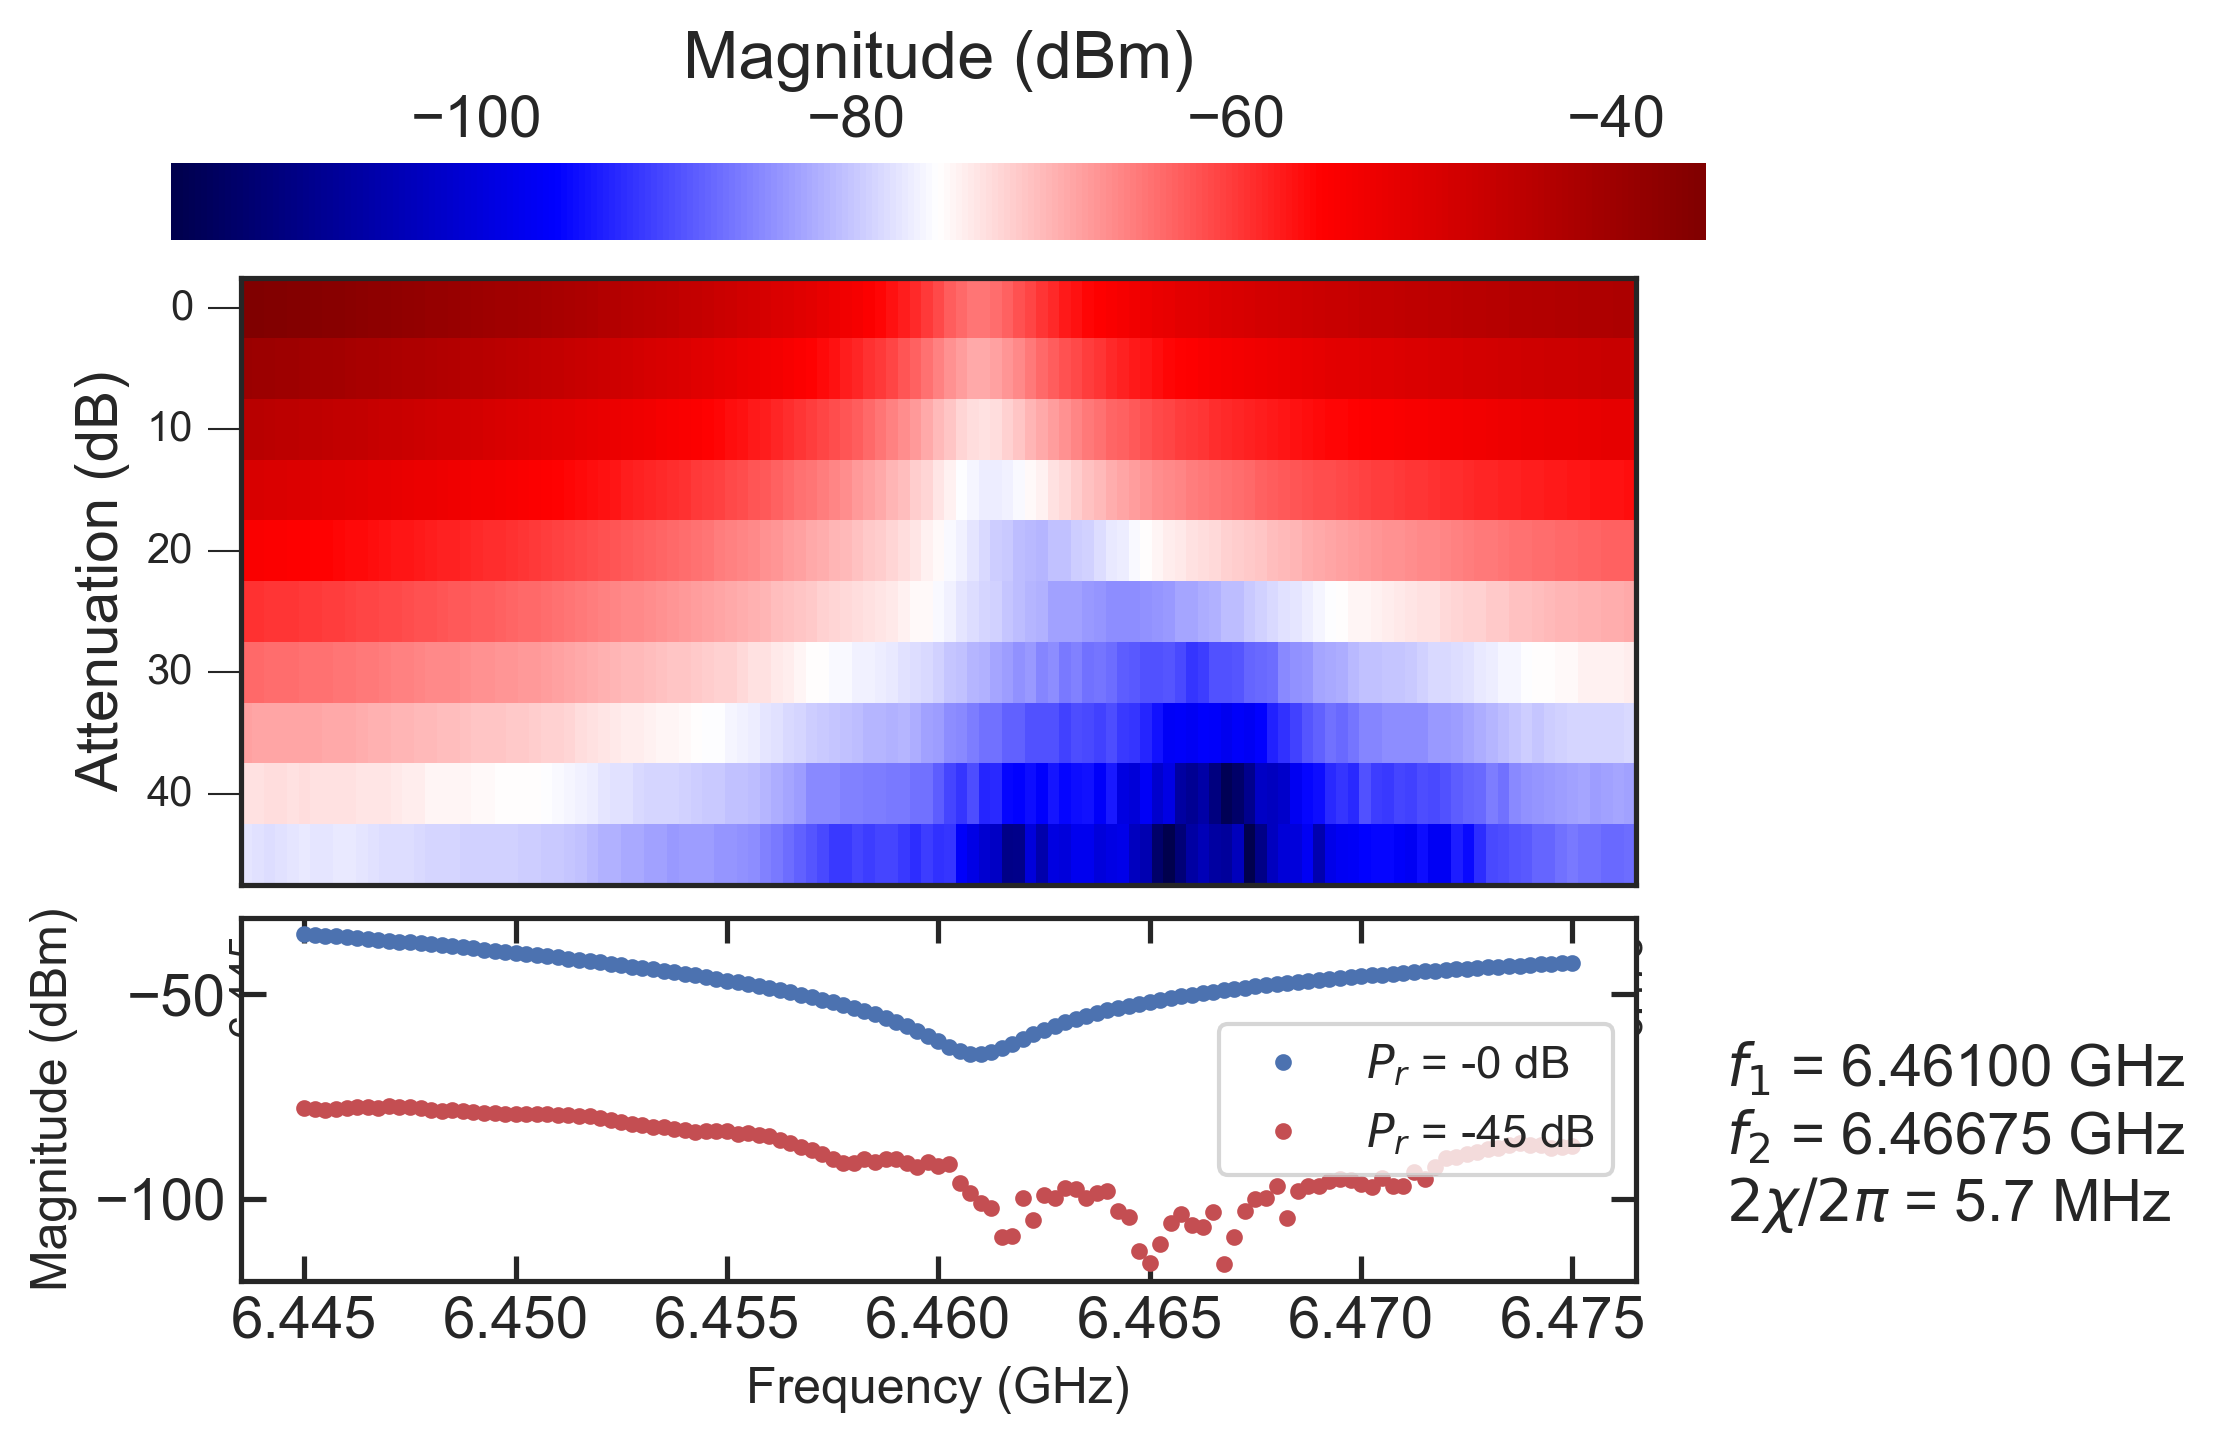

In [118]:
pf.punchout_plot(data,xlabel='Frequency (GHz)',ylabel='Attenuation (dB)',cbar_label='Magnitude (dBm)')

In [155]:
qb.update_value('readout_atten',30)

Updating readout_atten to 30
Setting DA attenuation to 30.


# Qubit Spectroscopy

The first time we run qubit spectroscopy we have to use a high qubit driving amplitude for a couple of reasons. 
1. Detect higher levels like $\omega_{02}/2$ and $\omega_{03}/3$ so you can calculate anharmonicity.
2. Since you don't know exactly what the qubit frequency is going to be (unless you've nailed the fab process), you will have to execute a broad sweep. Driving the qubit at high power broadens the resonance (decreases coherence), makes it easier to detect $\omega_{01}$ -> frequency spacing can be larger.

Due to the negative anharmonicity of the transmon (assuming the device you are working with is a transmon!), the $\omega_{02}/2$ peak is going to have smaller frequency than the $\omega_{01}$ resonance. Keep that in mind when setting up the frequency sweep. 

The *on_off* option of the qubit spectroscopy experiment is there to help distinguish small signals. The off measurement consists of no qubit excitation; just a readout pulse. The on measurement is the regular qubit excitation, followed by readout. The difference between the measurements results is what is saved as our data. The measurement will take almost twice as long, but it might be needed when doing spectroscopy at low powers.

**Some important parameters to setup properly before executing qubit spectroscopy**
1. qubit reset time (qb.pars['resettime']['qubit']): time to wait after performing an ON measurement.
2. amp_q_scaling: explained above
3. 


In [197]:
amp_q_scaling = 1
qb.update_value('n_avg',1000)
qb.update_value('rr_freq', 6.465e9)
# qb.update_value('rr_IF', 50e6)
qb.update_value('readout_atten',27)
qb.update_value('rr_LO', qb.pars['rr_freq'] - qb.pars['rr_IF'])
qb.pars['resettime']['qubit'] = int(20e3)
qb.write_pars()
qb.experiment = 'qubit_spec'
data, job = qb.qubit_spec(element='qubit',
                                check_mixers=False,
                                IF_min=10e6,
                                IF_max=395e6,
                                f_LO=5.8e9,
                                df=0.5e6,
                                on_off=True,
                                amp_q_scaling = amp_q_scaling,
                                saturation_dur = 20e3,
                                showprogress=True,
                                savedata=False)

Updating n_avg to 1000
Updating rr_freq to 6461000000.0
Updating readout_atten to 27
Setting DA attenuation to 27.
Updating rr_LO to 6456000000.0
Setting readout_LO frequency to 6456000000.0.
Updating qubit_LO to 5800000000.0
Setting qubit_LO frequency to 5800000000.0.
2024-04-05 19:58:48,159 - qm - INFO     - Performing health check
2024-04-05 19:58:48,171 - qm - INFO     - Health check passed
2024-04-05 19:58:48,272 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 19:58:48,372 - qm - INFO     - Executing program


100%|█████████▉| 999/1000 [02:10<00:00,  7.65it/s]


Peak threshold at 0.004094629907761309


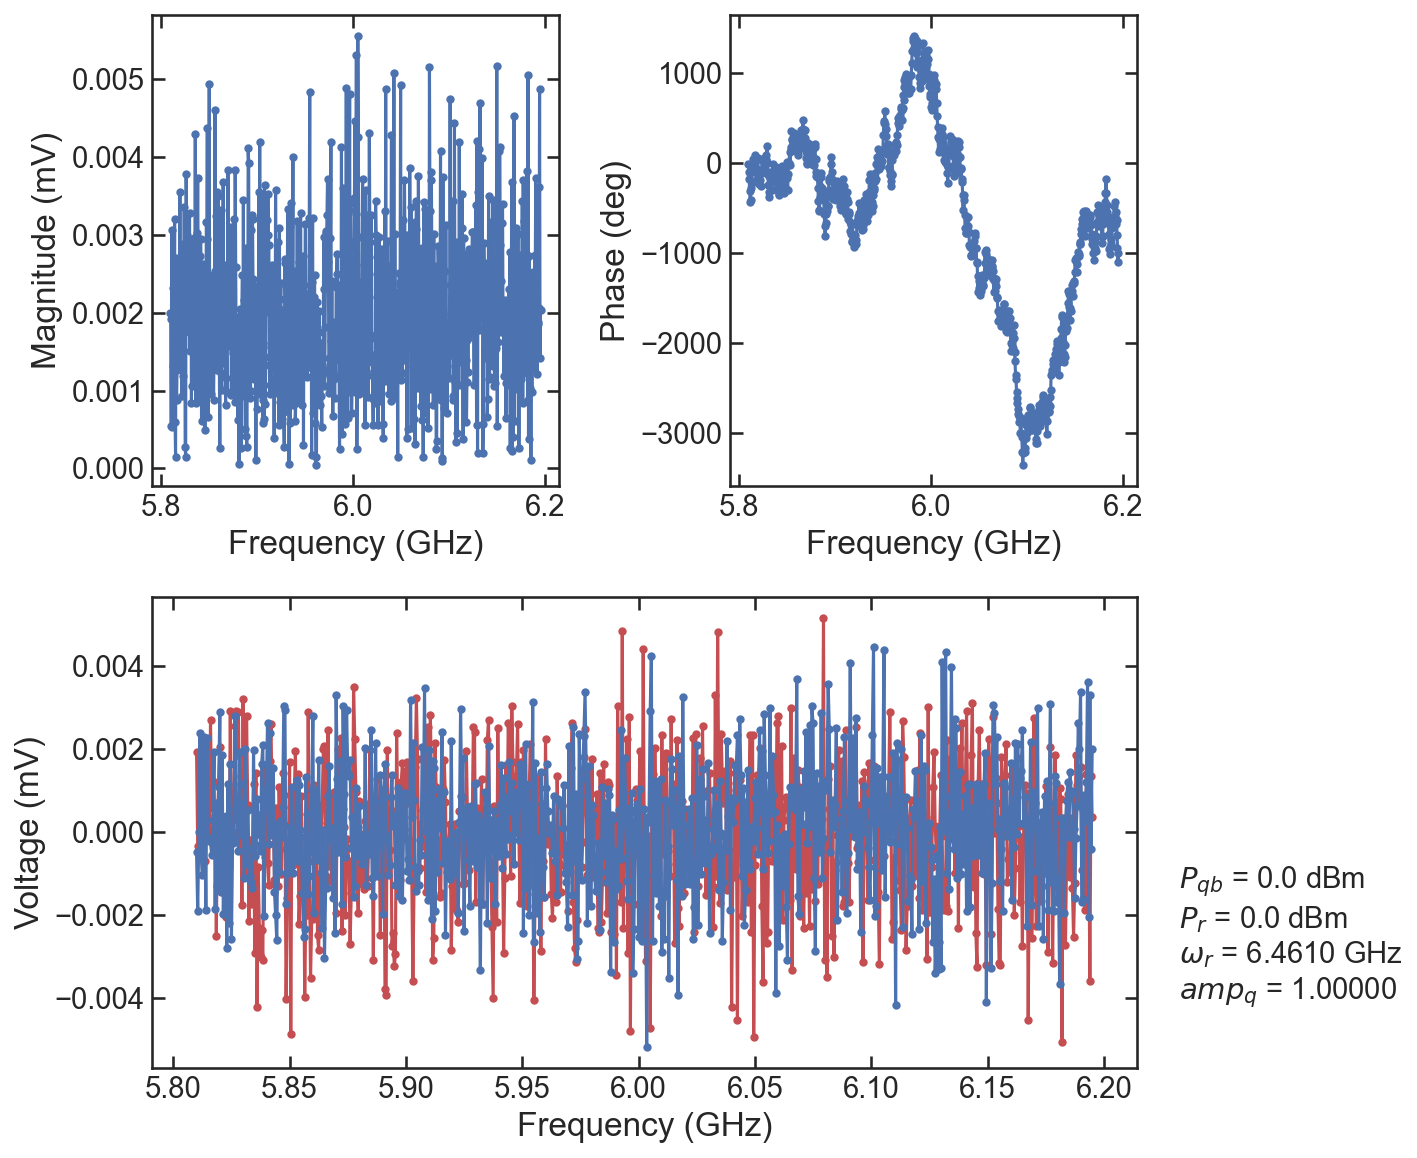

In [198]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,find_peaks=True, amp_q_scaling=amp_q_scaling)

## Run broad spectroscopy scan on qubit

In [146]:
qb._instruments.set('sa','frequency',6e9)

Setting sa frequency to 6000000000.0.


In [147]:
qb.update_value('n_avg',5000)
qb.update_value('rr_freq', 6.464e9)
qb.update_value('rr_IF', 50e6)
qb.update_value('rr_LO', qb.pars['rr_freq'] - qb.pars['rr_IF'])
qb.pars['resettime']['qubit'] = int(20e3)
qb.write_pars()
df_qubit_spec = 2e6
data, job = qb.run_scan(df = df_qubit_spec, element='qubit',
                                check_mixers=False,
                                chunksize = 200e6,
                                lo_min = 5e9,
                                lo_max = 6e9,
                                amp_q_scaling = 1,
                                on_off=True,
                                saturation_dur = 20e3,                   
                                showprogress=True,
                                savedata=False)

Updating n_avg to 5000
Updating rr_freq to 6464000000.0
Updating rr_IF to 50000000.0
Updating rr_LO to 6414000000.0
Setting readout_LO frequency to 6414000000.0.


  0%|          | 0/6 [00:00<?, ?it/s]

Updating qubit_LO to 5000000000.0
Setting qubit_LO frequency to 5000000000.0.
2024-04-05 13:05:37,057 - qm - INFO     - Performing health check
2024-04-05 13:05:37,069 - qm - INFO     - Health check passed
2024-04-05 13:05:37,174 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 13:05:37,275 - qm - INFO     - Executing program


 17%|█▋        | 1/6 [01:25<07:07, 85.45s/it]

Updating qubit_LO to 5200000000.0
Setting qubit_LO frequency to 5200000000.0.
2024-04-05 13:07:02,493 - qm - INFO     - Performing health check
2024-04-05 13:07:02,522 - qm - INFO     - Health check passed
2024-04-05 13:07:02,626 - qm - INFO     - Sending program to QOP for compilation
2024-04-05 13:07:02,912 - qm - INFO     - Executing program


 17%|█▋        | 1/6 [01:28<07:21, 88.33s/it]


KeyboardInterrupt: 

Peak threshold at 0.0031648036885937687
Peaks at: 6.08 GHz



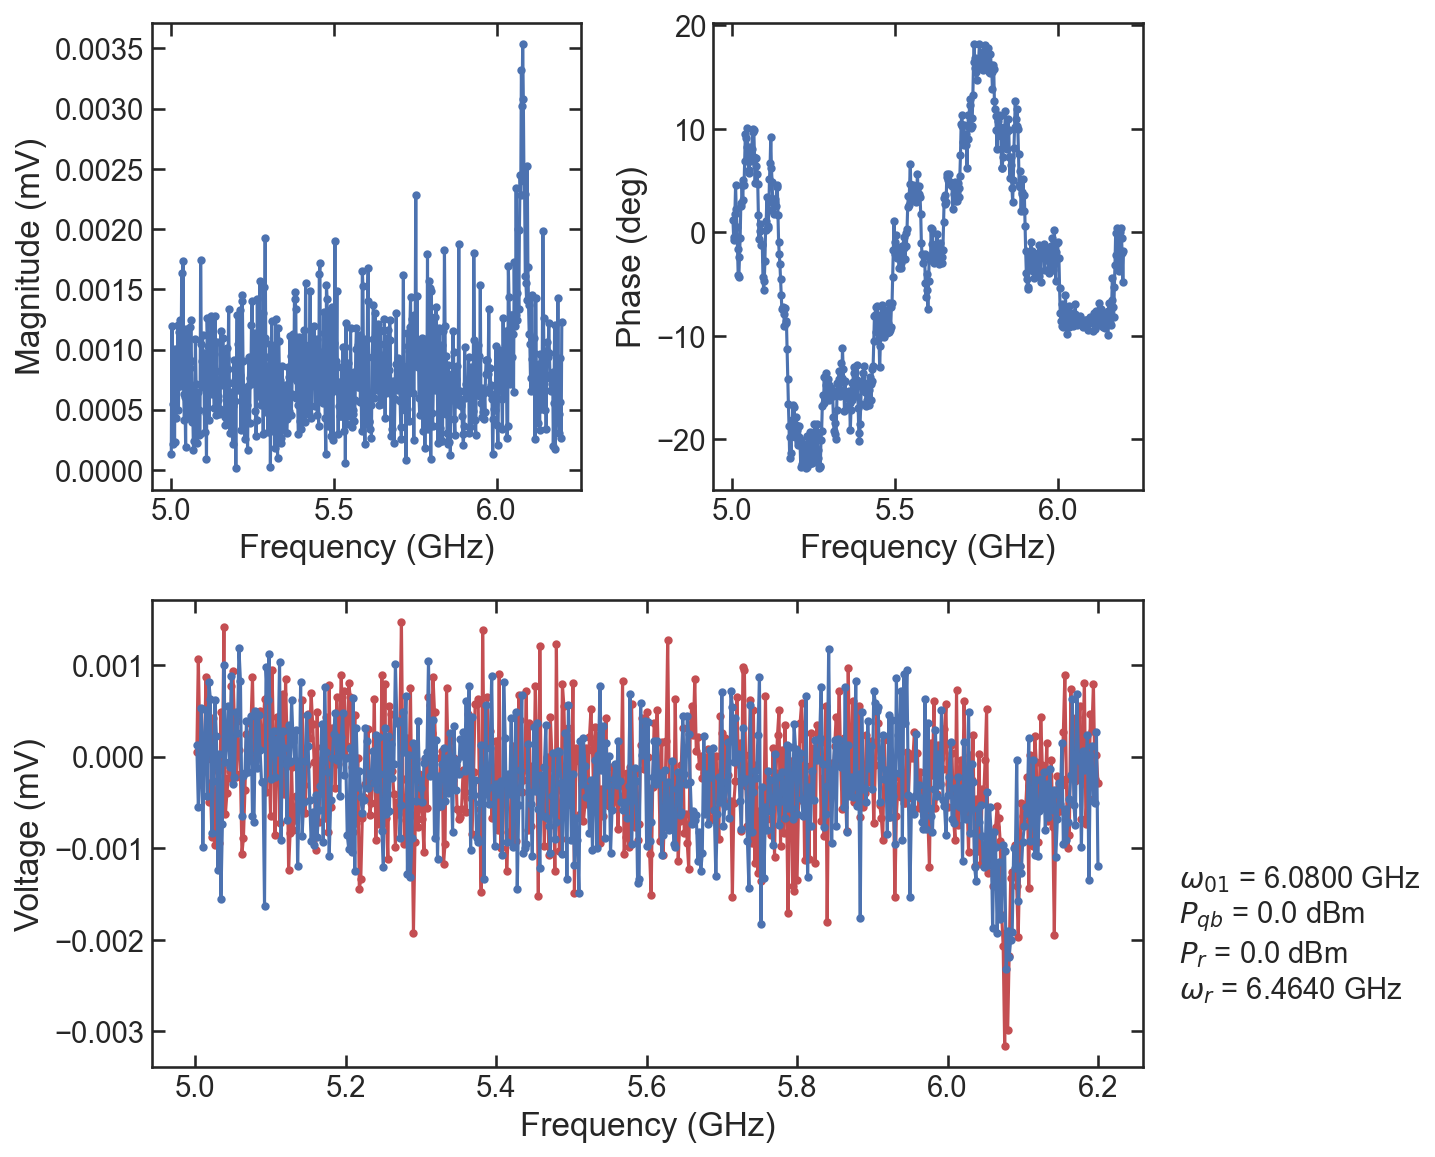

In [144]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,df=df_qubit_spec,rrFreq=qb.pars['rr_freq'],amp_q_scaling=1)

In [140]:
data['freqs']

[5050000000.0,
 5100000000.0,
 5150000000.0,
 5200000000.0,
 5250000000.0,
 5300000000.0,
 5350000000.0,
 5400000000.0,
 5450000000.0,
 5500000000.0,
 5550000000.0,
 5600000000.0,
 5650000000.0,
 5700000000.0,
 5750000000.0,
 5800000000.0,
 5850000000.0,
 5900000000.0,
 5950000000.0,
 6000000000.0,
 6050000000.0,
 6100000000.0,
 6150000000.0,
 6200000000.0]